In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In /home/chris/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/chris/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/chris/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#file = "../code/data/as-skitter.lpairs.space.csv"
file = "../code/data/soc-slashdot.ghpairs.space.csv"
df = pd.read_csv(file)

# add new columns for lastLayer w/o inter
for prefix in ['nodes','edges','dfsNodes','dfsEdges']:
    for dir in ['S','T']:
        newName = f"{prefix}InLastLayer{dir}\inter"
        lastLayer = f"{prefix}InLastLayer{dir}"
        intersection = prefix+"InInter"
        if prefix[0:3]=='dfs' and dir=='T':
            df[newName] = [0]*len(df)
        else:
            df[newName] = df[lastLayer] - df[intersection]
        
# add flow column
df['flow'] = df['flowBefore'].shift(-1, fill_value=0) - df['flowBefore']
df['flow'] = df['flow'].clip(lower=0)

print(f'read {file} with {len(df)} rows')

read ../code/data/soc-slashdot.ghpairs.space.csv with 386880 rows


In [3]:
width = 0.3

colors = {
    'BeforeLastLayerS': 'r', 
    'InLastLayerS\inter': 'c', 
    'InInter': 'y', 
    'InLastLayerT\inter': 'b', 
    'BeforeLastLayerT': 'g',
    
    'lastLayerS': 'r',
    'lastLayerT': 'g',
    
    'distOfSink': 'b',
    'flow': 'k',
    'ROUND': 'k',
}

spaceKeys = ['BeforeLastLayerS', 'InLastLayerS\inter', 'InInter', 'InLastLayerT\inter', 'BeforeLastLayerT']
spaceKeysNodes = ['nodes'+ key for key in spaceKeys]
spaceKeysEdges = ['edges'+ key for key in spaceKeys]
spaceKeys2 = ['BeforeLastLayerS', 'InInter', 'BeforeLastLayerT']
spaceKeysNodes2 = ['nodes'+ key for key in spaceKeys2]
spaceKeysEdges2 = ['edges'+ key for key in spaceKeys2]

bfsKeys = ['BeforeLastLayerS', 'BeforeLastLayerT']
bfsKeysNodes = ['nodes'+ key for key in bfsKeys]
bfsKeysEdges = ['edges'+ key for key in bfsKeys]
# dfsSpaceKeys = ['BeforeLastLayerS', 'InLastLayerS\inter', 'InInter', 'BeforeLastLayerT'] # for noskip
dfsSpaceKeys = ['BeforeLastLayerS', 'InInter', 'BeforeLastLayerT']
dfsSpaceKeysNodes = ['nodes'+ key for key in dfsSpaceKeys]
dfsSpaceKeysEdges = ['edges'+ key for key in dfsSpaceKeys]
dfsActualKeysNodes = ['dfsNodes'+ key for key in dfsSpaceKeys]
dfsActualKeysEdges = ['dfsEdges'+ key for key in dfsSpaceKeys]

for key in spaceKeys:
    colors['nodes'+key] = colors[key]
    colors['edges'+key] = colors[key]
    colors['dfsNodes'+key] = colors[key]
    colors['dfsEdges'+key] = colors[key]

# labels are just keys for now except space keys where prefix is omitted
labels = {}
for key in colors.keys():
    labels[key] = key
for key in spaceKeys:
    labels['nodes'+key] = key
    labels['edges'+key] = key
    labels['dfsNodes'+key] = key
    labels['dfsEdges'+key] = key
    
def addBars(ax,data,keys,addLabels=True, pos=None):
    heights = pd.Series([0]*len(data), index=data.index)
    if not pos:
        pos = range(len(data))
    for key in keys:
        ax.bar(pos, data[key], width, color=colors[key], bottom=heights, label=labels[key] if addLabels else '')
        heights = heights + data[key]

# one stacked bar chart per s-t pair
a bar represents one round of dinics

stats for flow between 1 and 0 with algorithm BI
deg S       143
deg T       211
total flow  143


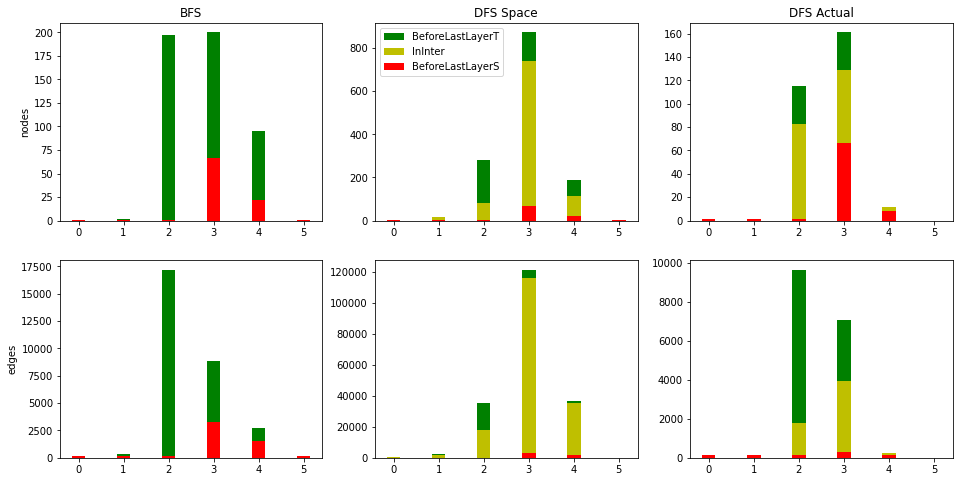

stats for flow between 1 and 0 with algorithm UNI
deg S       143
deg T       211
total flow  143


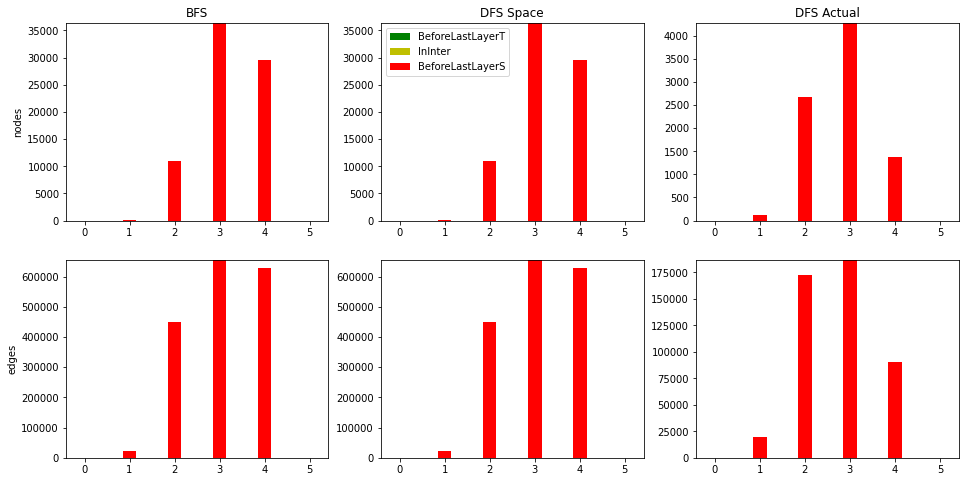

stats for flow between 2 and 0 with algorithm BI
deg S       53
deg T       211
total flow  53


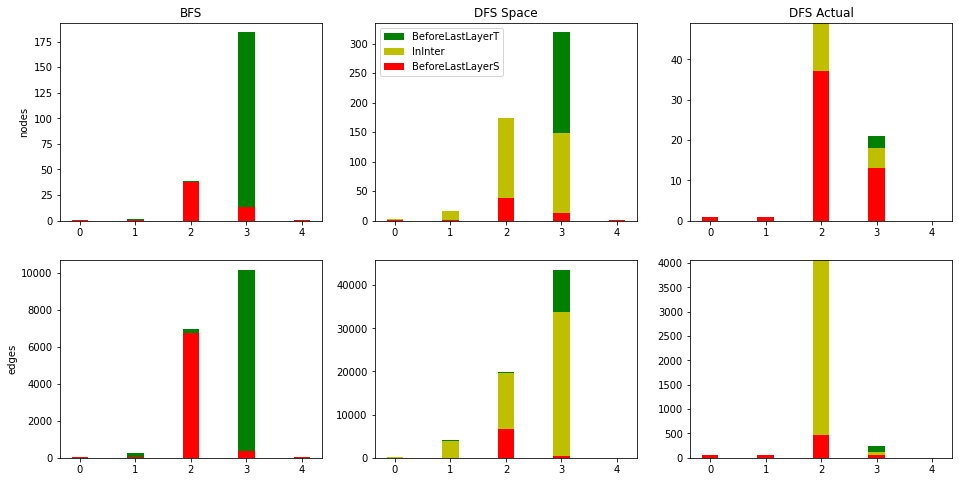

stats for flow between 2 and 0 with algorithm UNI
deg S       53
deg T       211
total flow  53


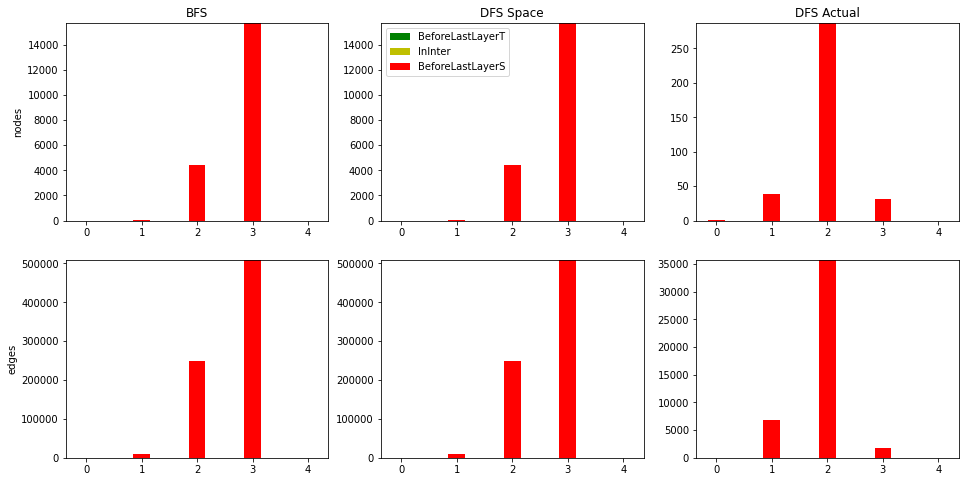

stats for flow between 3 and 0 with algorithm BI
deg S       109
deg T       211
total flow  108


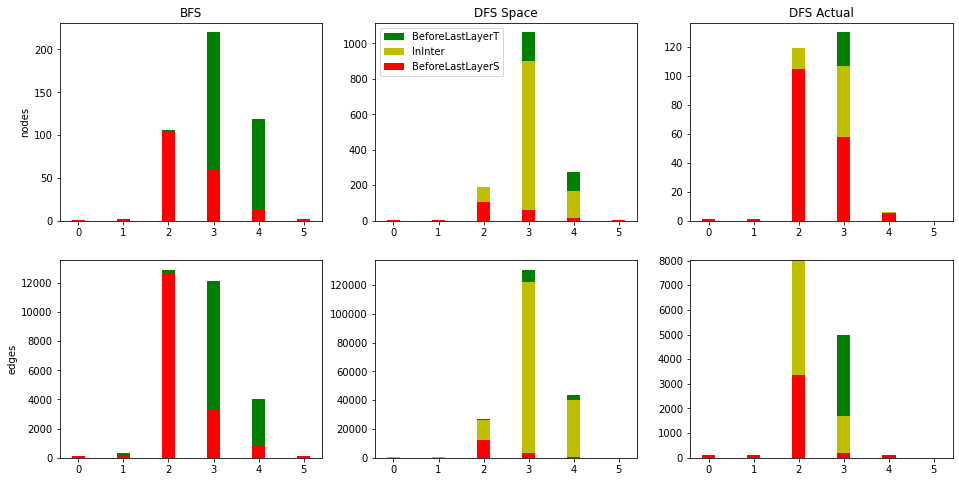

stats for flow between 3 and 0 with algorithm UNI
deg S       109
deg T       211
total flow  108


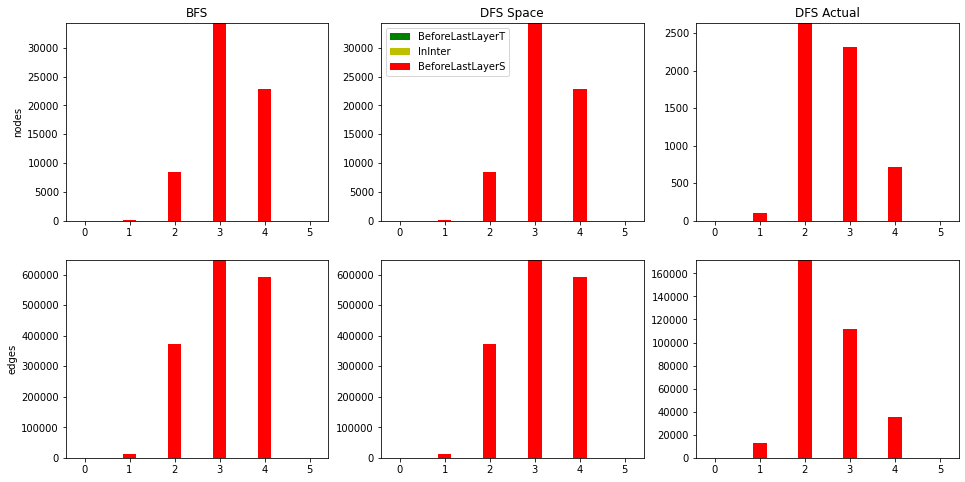

stats for flow between 4 and 0 with algorithm BI
deg S       101
deg T       211
total flow  99


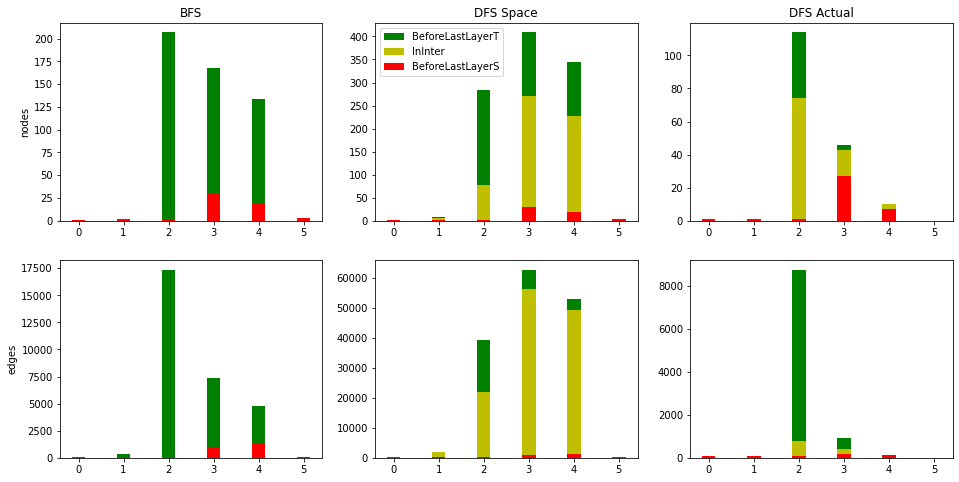

stats for flow between 4 and 0 with algorithm UNI
deg S       101
deg T       211
total flow  99


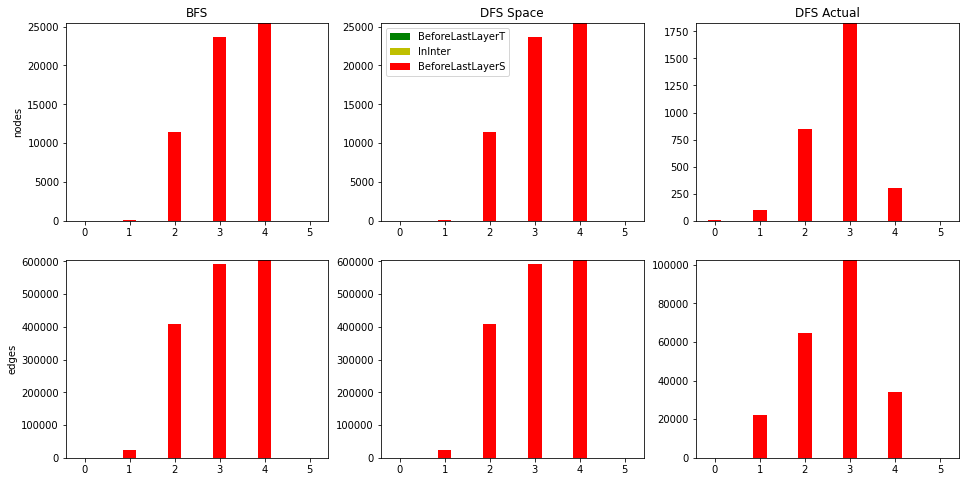

stats for flow between 5 and 0 with algorithm BI
deg S       3
deg T       211
total flow  3


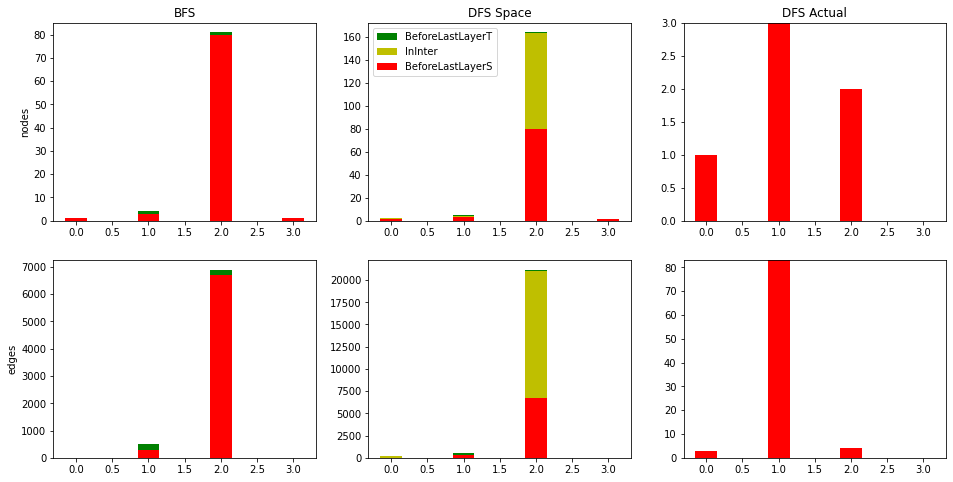

stats for flow between 5 and 0 with algorithm UNI
deg S       3
deg T       211
total flow  3


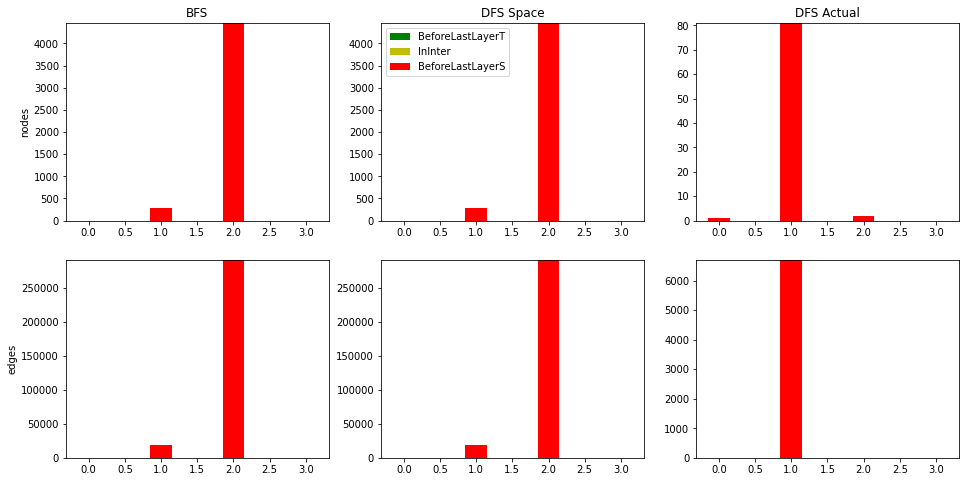

stats for flow between 6 and 0 with algorithm BI
deg S       65
deg T       211
total flow  64


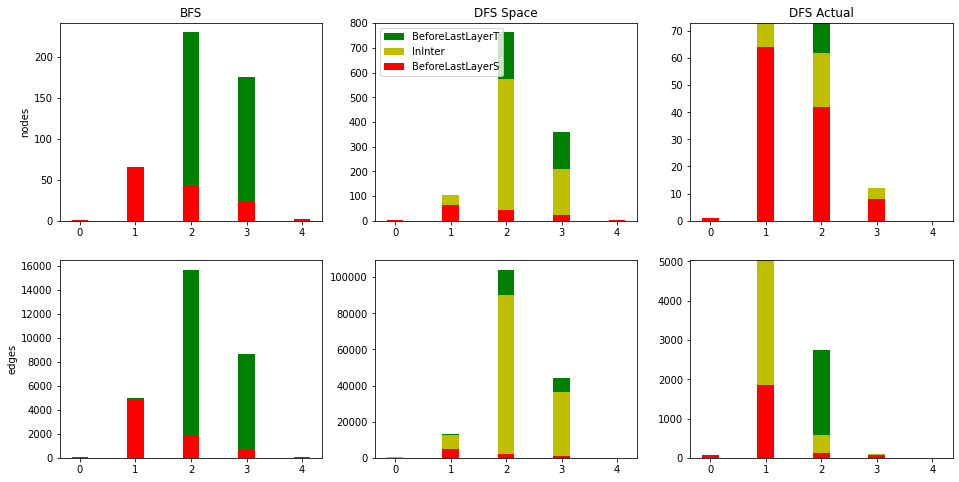

stats for flow between 6 and 0 with algorithm UNI
deg S       65
deg T       211
total flow  64


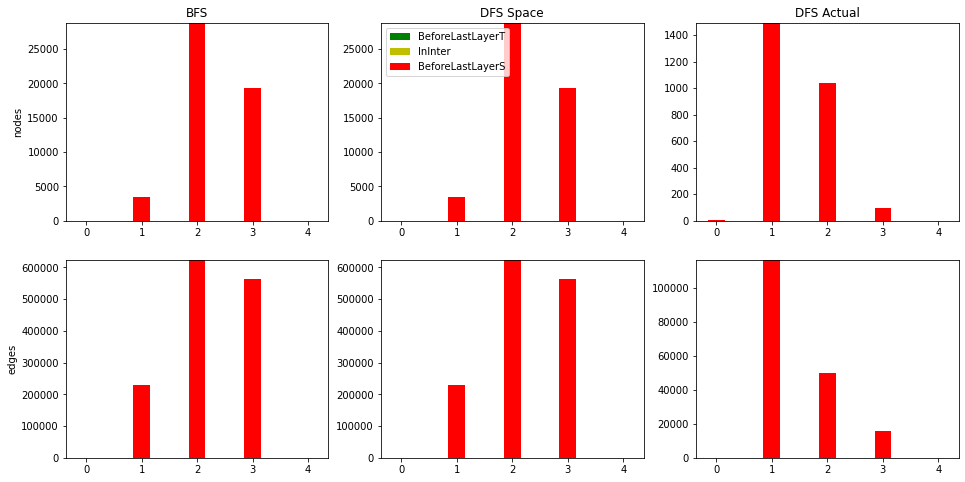

stats for flow between 7 and 0 with algorithm BI
deg S       21
deg T       211
total flow  21


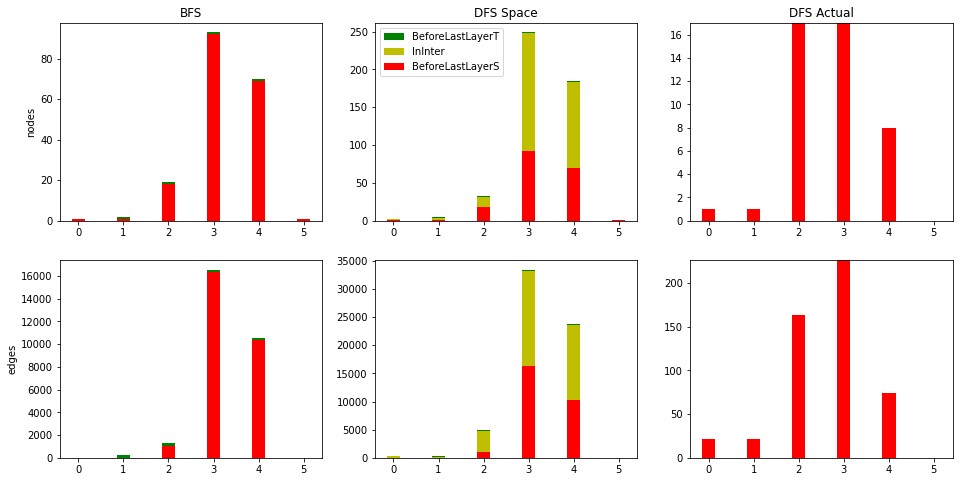

stats for flow between 7 and 0 with algorithm UNI
deg S       21
deg T       211
total flow  21


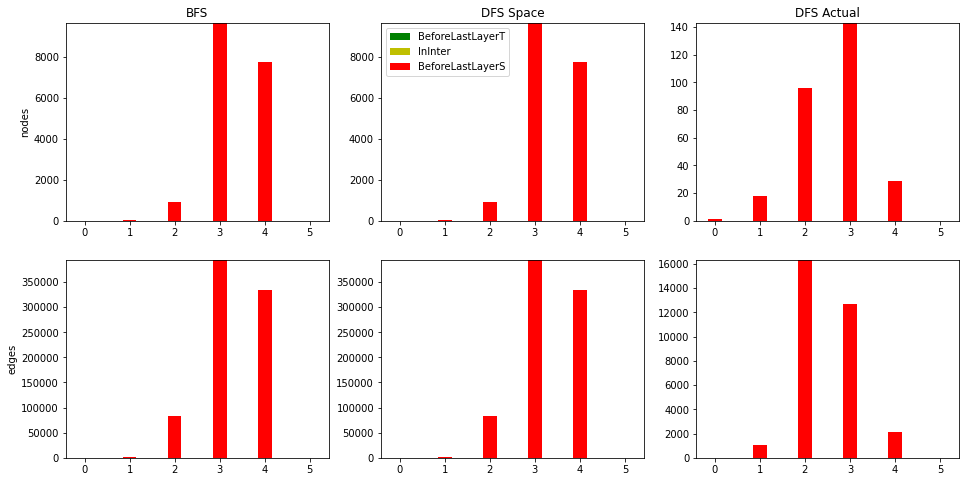

stats for flow between 8 and 0 with algorithm BI
deg S       330
deg T       211
total flow  204


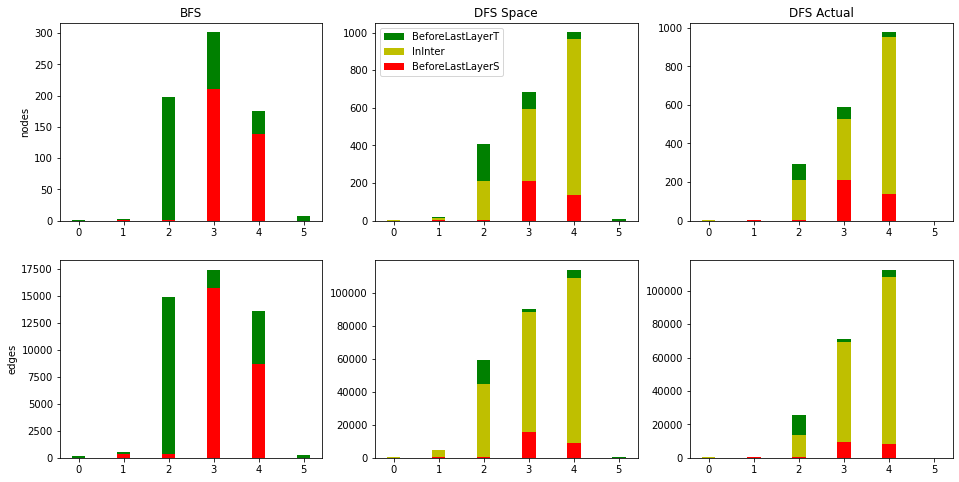

stats for flow between 8 and 0 with algorithm UNI
deg S       330
deg T       211
total flow  204


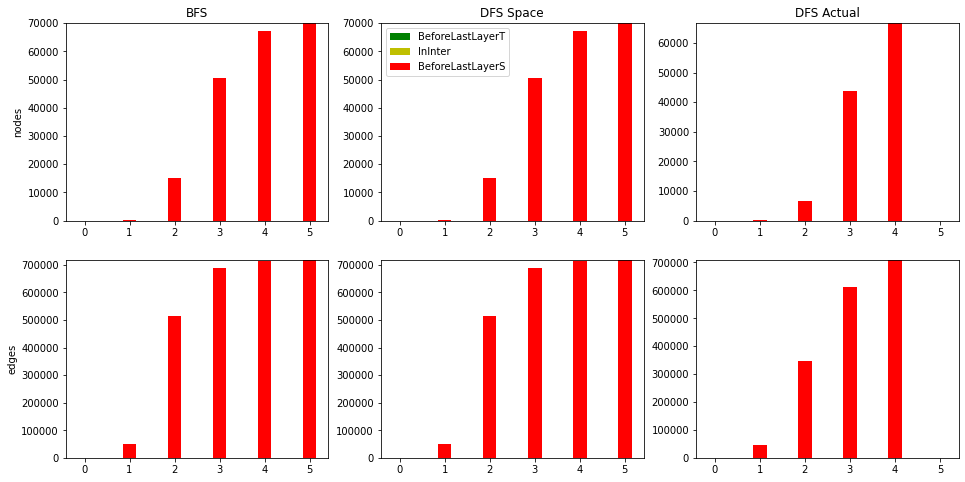

stats for flow between 9 and 8 with algorithm BI
deg S       4
deg T       330
total flow  3


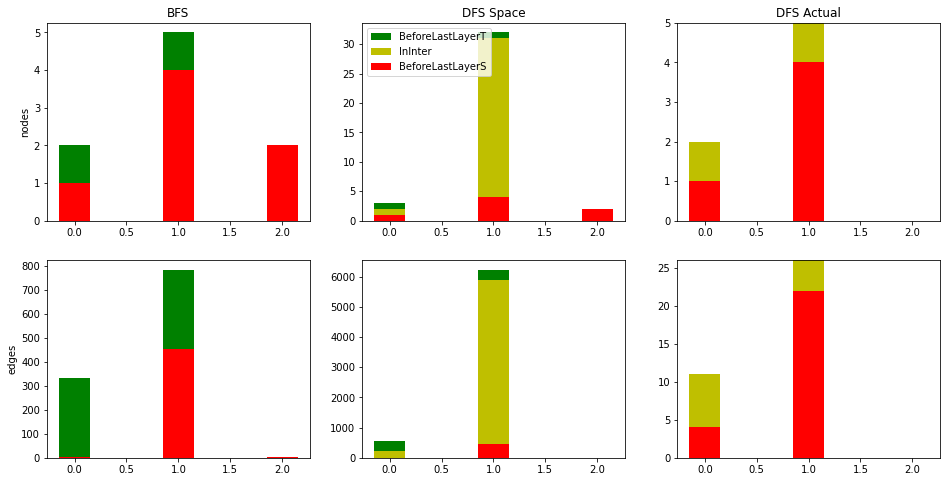

stats for flow between 9 and 8 with algorithm UNI
deg S       4
deg T       330
total flow  3


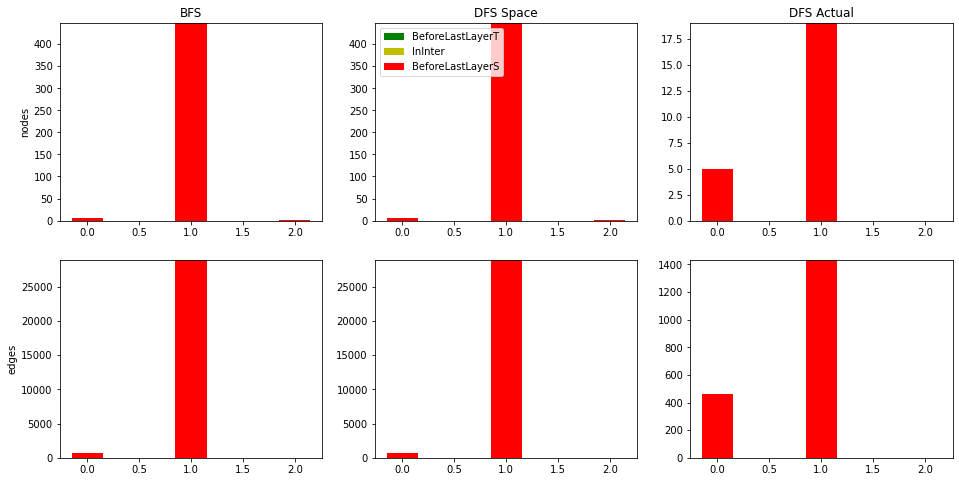

In [5]:
def showIndividualRuns(df):
    mx = 10
    for (s,t), pair_data in df.groupby(['S','T']):
        mx -= 1
        if mx == 0:
            break
        for dir, run_data in pair_data.groupby('DIRECTION'):
            print(f'stats for flow between {s} and {t} with algorithm {dir}')
            print(f'deg S       {run_data.SDEG.iloc[0]}')
            print(f'deg T       {run_data.TDEG.iloc[0]}')
            print(f'total flow  {run_data.flow.sum()}')

            fig, axs = plt.subplots(2,3, figsize=(16,8))
            axs[0][0].set_title('BFS')
            axs[0][1].set_title('DFS Space')
            axs[0][2].set_title('DFS Actual')
            axs[0][0].set_ylabel('nodes')
            axs[1][0].set_ylabel('edges')

            addBars(axs[0][0],run_data,keys=bfsKeysNodes)
            addBars(axs[1][0],run_data,keys=bfsKeysEdges)

            addBars(axs[0][1],run_data,keys=dfsSpaceKeysNodes)
            addBars(axs[1][1],run_data,keys=dfsSpaceKeysEdges)

            addBars(axs[0][2],run_data,keys=dfsActualKeysNodes)
            addBars(axs[1][2],run_data,keys=dfsActualKeysEdges)

            h, l = axs[0][1].get_legend_handles_labels()
            axs[0][1].legend(h[::-1], l[::-1], loc='upper left')
            plt.show()
            
showIndividualRuns(df)

# one stacked bar chart per algorithm (UNI or BI)
a bar represents the total search space during one dinics run

In [5]:
def showAllPairs(df):
    for dir, dir_data in df.groupby('DIRECTION'):
        print('Direction', dir)
        fig, axs = plt.subplots(2,3, figsize=(16,8))
        axs[0][0].set_title('BFS')
        axs[0][1].set_title('DFS Space')
        axs[0][2].set_title('DFS Actual')
        axs[0][0].set_ylabel('nodes')
        axs[1][0].set_ylabel('edges')

        aggregated = dir_data.groupby(['S','T']).sum()
        addBars(axs[0][0],aggregated,keys=bfsKeysNodes)
        addBars(axs[1][0],aggregated,keys=bfsKeysEdges)

        addBars(axs[0][1],aggregated,keys=dfsSpaceKeysNodes)
        addBars(axs[1][1],aggregated,keys=dfsSpaceKeysEdges)

        addBars(axs[0][2],aggregated,keys=dfsActualKeysNodes)
        addBars(axs[1][2],aggregated,keys=dfsActualKeysEdges)

        # draw legend for topleft plot reversed
        h, l = axs[0][1].get_legend_handles_labels()
        axs[0][1].legend(h[::-1], l[::-1], loc='upper left')

        plt.show()

# everything in 4 plots
a bar represents the total search space in nodes (or edges) of an algorithm (UNI or BI) over all s-t pairs

Search Space over all pairs in file ../code/data/soc-slashdot.ghpairs.space.csv
bars from left to right are: BFS, DFS Space, DFS Actual

Direction: BI


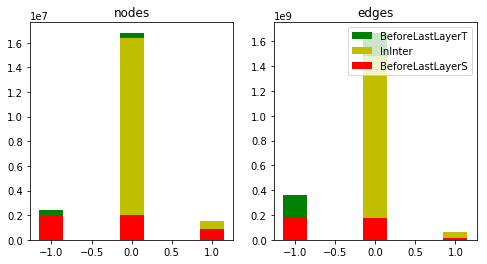


Direction: UNI


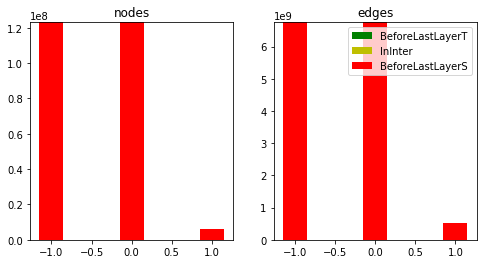

In [6]:
print('Search Space over all pairs in file', file)
print('bars from left to right are: BFS, DFS Space, DFS Actual')
for dir, dir_data in df.groupby('DIRECTION'):
    print()
    print('Direction:', dir)
    fig, axs = plt.subplots(1,2, figsize=(8,4))
    axs[0].set_title('nodes')
    axs[1].set_title('edges')
    
    aggregated = dir_data.groupby(['S','T']).sum().sum()
    addBars(axs[0],aggregated,keys=bfsKeysNodes, pos=[-1], addLabels=False)
    addBars(axs[1],aggregated,keys=bfsKeysEdges, pos=[-1], addLabels=False)

    addBars(axs[0],aggregated,keys=dfsSpaceKeysNodes, pos=[0])
    addBars(axs[1],aggregated,keys=dfsSpaceKeysEdges, pos=[0])

    addBars(axs[0],aggregated,keys=dfsActualKeysNodes, pos=[+1], addLabels=False)
    addBars(axs[1],aggregated,keys=dfsActualKeysEdges, pos=[+1], addLabels=False)

    # draw legend for topleft plot reversed
    h, l = axs[1].get_legend_handles_labels()
    axs[1].legend(h[::-1], l[::-1], loc='upper right')

    plt.show()

# numerical stats about total space

In [7]:
# aggregate totals
numPairs = len(df.groupby(['S','T']))
totals = {'allNodes': 1696415*numPairs, 'allEdges': 11095298*2*numPairs}
for dir, dir_data in df.groupby('DIRECTION'):
    runs = dir_data.groupby(['S','T'])
    agg = runs.sum().sum()
    totals[dir+'bfsNodes'] = agg[bfsKeysNodes].sum()
    totals[dir+'bfsEdges'] = agg[bfsKeysEdges].sum()
    totals[dir+'dfsNodes'] = agg[dfsActualKeysNodes].sum()
    totals[dir+'dfsEdges'] = agg[dfsActualKeysEdges].sum()
    numBFS = len(dir_data)
    numDFS = len(dir_data)-len(runs)
    print('Direction  ', dir)
    print('pairs      ', len(runs))
    print('avg SDEG   ', runs.SDEG.first().mean())
    print('avg TDEG   ', runs.TDEG.first().mean())
    print('avg rounds ', runs.ROUND.max().add(1).mean())
    print('avg flow/R ', dir_data.flow.mean())
    print('avg BFS    ', totals[dir+'bfsNodes']//numBFS, totals[dir+'bfsEdges']//numBFS)
    print('avg DFS    ', totals[dir+'dfsNodes']//numDFS, totals[dir+'dfsEdges']//numDFS)

print()
print('UNI / ALL')
for trav in ['bfs', 'dfs']:
    for item in ['Nodes','Edges']:
        print(f'UNI-{trav} looks at', 
              '%.2f' % (totals[f'UNI{trav}{item}'] / totals[f'all{item}']), 
              f'times all {item}')

print('UNI / BI')
for trav in ['bfs', 'dfs']:
    for item in ['Nodes','Edges']:
        print(f'UNI-{trav} looks at', 
              '%.2f' % (totals[f'UNI{trav}{item}'] / totals[f'BI{trav}{item}']), 
              f'times BI-{trav} {item}')


Direction   BI
pairs       70067
avg SDEG    10.234247220517505
avg TDEG    1491.6308390540482
avg rounds  2.7607861047283313
avg flow/R  3.543072787427626
avg BFS     12 1878
avg DFS     12 503
Direction   UNI
pairs       70067
avg SDEG    10.234247220517505
avg TDEG    1491.6308390540482
avg rounds  2.7607861047283313
avg flow/R  3.543072787427626
avg BFS     636 34915
avg DFS     50 4323

UNI / ALL
UNI-bfs looks at 0.00 times all Nodes
UNI-bfs looks at 0.00 times all Edges
UNI-dfs looks at 0.00 times all Nodes
UNI-dfs looks at 0.00 times all Edges
UNI / BI
UNI-bfs looks at 50.96 times BI-bfs Nodes
UNI-bfs looks at 18.59 times BI-bfs Edges
UNI-dfs looks at 4.01 times BI-dfs Nodes
UNI-dfs looks at 8.59 times BI-dfs Edges
